<a href="https://colab.research.google.com/github/adgcal/Anjan_collab_R/blob/main/11_sysbiol_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
packages_to_load <- c("dplyr", "ggplot2", "tidyr", "devtools","grid", "rootsolve")
lapply(packages_to_load, install.packages, character.only = TRUE);



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Warning message in FUN(X[[i]], ...):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in FUN(X[[i]], ...):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in FUN(X[[i]], ...):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in FUN(X[[i]], ...):
“installation of package ‘devtools’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is uns

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

In [4]:
library(dplyr)

In [5]:
library(ggplot2)

In [6]:
library(tidyr)

In [7]:
library(grid)

In [11]:
install.packages("rootSolve", repos="http://R-Forge.R-project.org")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
library(rootSolve)

## Definition
Dynamical systems are systems that change over time. The dominant way of modeling how such systems change is by means of differential equations. Differential equations relate the rate of change of a quantity $x$ — which is given by the time derivative $\frac{\mathrm{d}x}{\mathrm{d}t}$ — to the quantity itself:

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t}=f(x)
\label{eq:baseDynsys}
\end{equation}

## Meaning of a dynamical System
If we knew the function $f$, then this differential equation would give us the rate of change for any value of $x$. We are not particularly interested in this rate of change per se, however, but at the value of $x$ as a function of time $t$. We call the function $x(t)$ the solution of the differential equation. Most differential equations cannot be solved analytically, that is, we cannot get a closed-form expression of $x(t)$. Instead, differential equations are frequently solved numerically.


## Expanded form
In equation(\ref{eq:baseDynsys}) can be written in expanded form as
\begin{equation}
dx_i/dt = f_i (x1,x2,..,x_n)
\end{equation}

If n=1 , it is called 1D system and the dynamical system is of order 1, if n=2 it is 2D and so on.


## Simple numerical solution
How the system changes as a function of time, given by $x(t)$, is implicitly encoded in the differential equation. This is because, given any particular value of $x$, $f(x)$ tells us in which direction $x$ will change, and how quickly. It is this fact that we exploit when numerically solving differential equations. Specifically, given an initial condition $x_0 \equiv x(t = 0)$, $f(x_0)$ tells us in which direction and how quickly the system is changing. This suggests the following approximation method:

\begin{equation}
x_{n+1}=x_{n}+ \Delta_t f(x_{n})
\label{eq:euler}
\end{equation}

## Euler algorithm
In equation (\ref{eq:euler}) $n$ indexes the set {$x_0, x_1, \ldots$} and $\Delta_t$ is the time that passes between two iterations. This is the most primitive way of numerically solving differential equations, known as Euler’s method.


## An R  function illustrating Euler algorithm


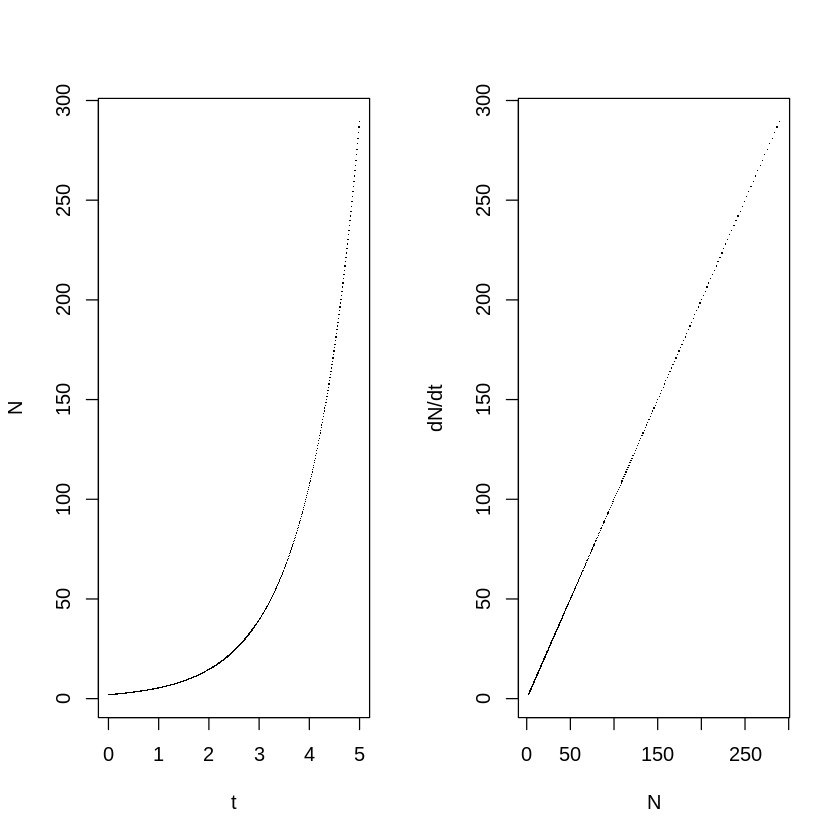

In [17]:
malthus <- function(x) x # Explain this function
solution_malthus <- solve(f = malthus, x0 = 2, nr_iter = 500, delta_t = 0.01)
# plotting
par(mfrow=c(1,2))
plot(solution_malthus[,1],solution_malthus[,2],ylab='N',xlab='t',pch='.')
plot(solution_malthus[,2],malthus(solution_malthus[,2]),ylab='dN/dt',xlab='N',pch='.')

## Equilibrium point for Malthus model

The equilibrium point is defined by

\begin{equation}
\frac{dN^*}{dt}=f(N^*)=0
\end{equation}
In our model, the only equilibrium point is $N = 0$.

## Units and time scales
\small
Since $N$ is given in population, $r$ must be a rate, that is, have units $1 / \text{time}$. This brings us to a key question when dealing with dynamical system models. What is the time scale of the system?

## Rabits and bacteria
The model cannot by itself provide an appropriate time scale. In our case, it clearly depends on whether we are looking at, say, a population of bacteria or rabbits. We can provide the system with a time scale by appropriately changing $r$. Take the bacterium Escherichia coli, which can double every 20 minutes. We know from above that this means exponential growth:

## Exponentially growing bacterial culture

Escherichia coli, which can double every 20 minutes. We know from above that this means exponential growth. The solution to the equation at which the population will be doubled is given by:

\begin{align}
2=&\frac{N}{N_0}=exp(r\tau)\\
log_e 2 =& r/\tau\\
r=&log_e2/\tau \\
\frac{dN_{coli}}{dt}&=\frac{log 2}{20}. N_{coli}
\end{align}

## Problem : Suppose rabits take three months to double in population size. What will be the r valur of rabit (write a code and also verify by hand calculation)

## Sigmoidal population growth

A population cannot grow indefinitely because its growth depends on resources, which are finite. To account for this, Pierre-François Verhulst introduced a model with a carrying capacity K in 1838, which gives the maximum size of the population that can be sustained given resource constraints.

\begin{equation}
\frac{dN}{dt}=rN\left( \ 1-\frac{N}{K} \right)
\label{eq:Verhulst}
\end{equation}

## The non-dimensionalization tricks

 Using $x = \frac{N}{K}$ and $rt=\tau$ we can rewrite the equation(\ref{eq:Verhulst}) as:

\begin{equation}
\frac{dx}{d\tau}= x\left( \ 1-x \right)
\end{equation}


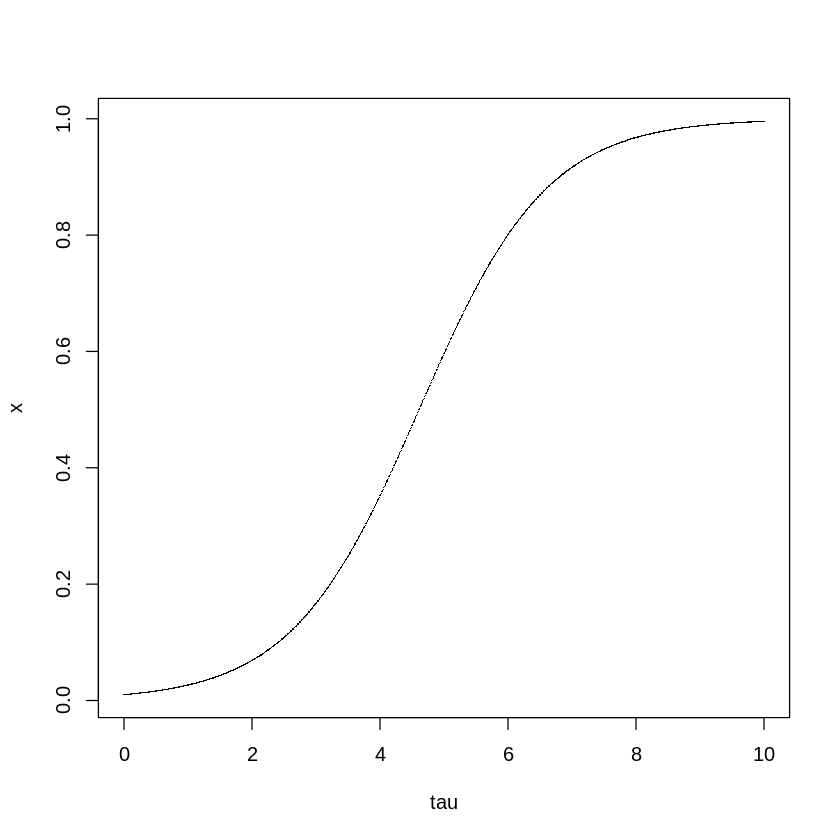

In [18]:
verhulst <- function(x) x * (1 - x)
solution_verhulst <- solve(f = verhulst, x0 = 0.01, nr_iter = 1000, delta_t = 0.01)
plot(solution_verhulst[,1],solution_verhulst[,2],pch='.',xlab='tau',ylab='x')


## Sketching the trajectory without solving


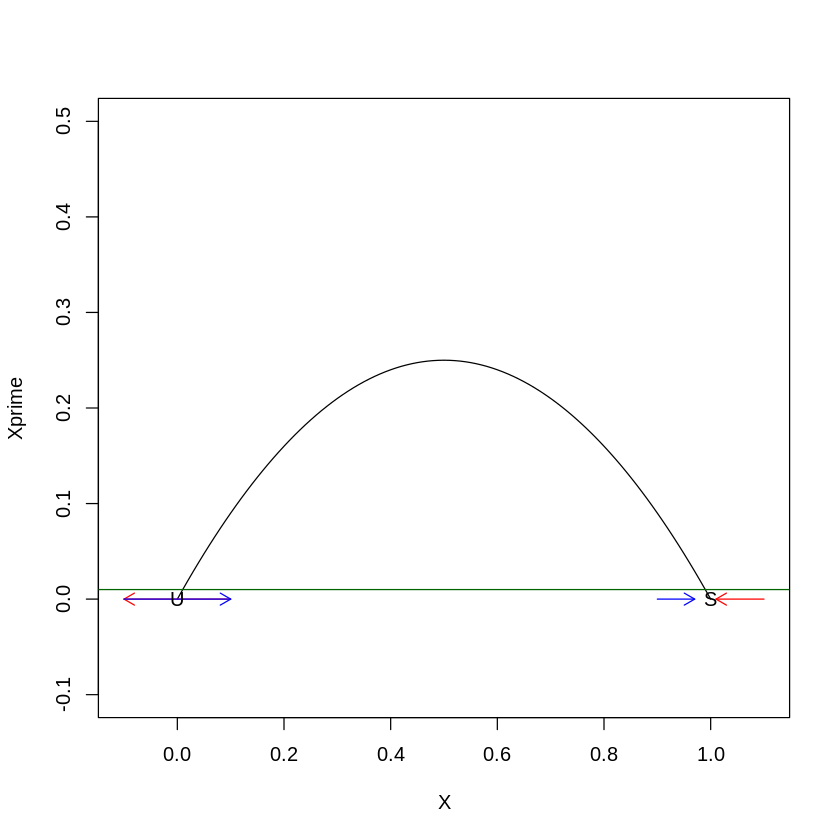

In [19]:
X<-seq(0,1,by=0.01)
Xprime=X*(1-X)
plot(X,Xprime,type='l',xlim=c(-0.1,1.1),ylim=c(-0.1,0.5))
abline(h= 0.01, col = "darkgreen")
arrows(x0=0.1,x1=-0.1,y0=0,y1=0,length = 0.1,col='red')
arrows(x0=-0.1,x1=0.1,y0=0,y1=0,length = 0.1,col='blue')
arrows(x0=0.9,x1=0.97,y0=0,y1=0,length = 0.1,col='blue')
arrows(x0=1.1,x1=1.01,y0=0,y1=0,length = 0.1,col='red')
points(0,0,pch="U")
points(1,0,pch="S")

## Problem
Write a code for Verhulst without dimensionalization.


## Linearization principle
For any  system  expressible by equation{ref{eq:baseDynsys}} the general approach to linearize is the following:

- Let x* is the equilibrium state i.e., f(x*)=0
- Let x=x*+$\eta$
- Expand f(x) by Taylor series : f(x)=f(x*)+$\eta$f'(x*) +$O(\eta^2)$

The modified system will be ;

\begin{equation}
\dot\eta = r\eta,r=f'(x*)
\label{eq:linsys1}
\end{equation}
We can clearly see that the  is comparable to Malthus equation when r>0 and when r<0 (as it happens in decay of a capacitor $dQ/dt = -Q/RC$ so that r = 1/RC). In the first case the equilibrium point is unstable ( that is the system moves away from it) and in the other case it is stable, that the system approaches equilibrium. Linearization however fails if r=0.


## Stability in situations where there is criticality
Let us consider the following systems ;
$dx/dt = x^2$,$dx/dt = -x^2$,$dx/dt = x^3$,$dx/dt = -x^3$
In all these cases f'(x*)=0. To assess stability we need to draw stability diagram.


In [20]:
stabdiag<-function(fun){
  eps=0.1
x=seq(-1,1,0.1)
y<-sapply(x,fun)
plot(x,y,type='l',xlim<-c(-1,1),ylim<-c(-1/2,1/2))
abline(h=0,v=0)
case1<-fun(-eps)[1]>0 & fun(eps)[1]>0
case2<-fun(-eps)[1]<0 & fun(eps)[1]<0
case3<-fun(-eps)[1]<0 & fun(eps)[1]>0
case4<-fun(-eps)[1]>0 & fun(eps)[1]<0
if(case1){
arrows(x0=-0.2,y0=0,x1=-0.1,y1=0,length = 0.05,col='red')
arrows(x0=0,y0=0,x1=0.2,y1=0,length = 0.05,col='blue')
}
if(case2){
arrows(x0=0.2,y0=0,x1=-0.2,y1=0,length = 0.05,col='red')
arrows(x0=0.2,y0=0,x1= 0.10,y1=0,length = 0.05,col='blue')
}
if(case3){
arrows(x0=0,y0=0,x1=0.2,y1=0,length = 0.05,col='blue')
arrows(x0=0,y0=0,x1=-0.2,y1=0,length = 0.05,col='red')
  }
if(case4){
arrows(x0=0.2,y0=0,x1=0.1,y1=0,length = 0.05,col='red')
arrows(x0=-0.2,y0=0,x1=-0.1,y1=0,length = 0.05,col='blue')
}
}

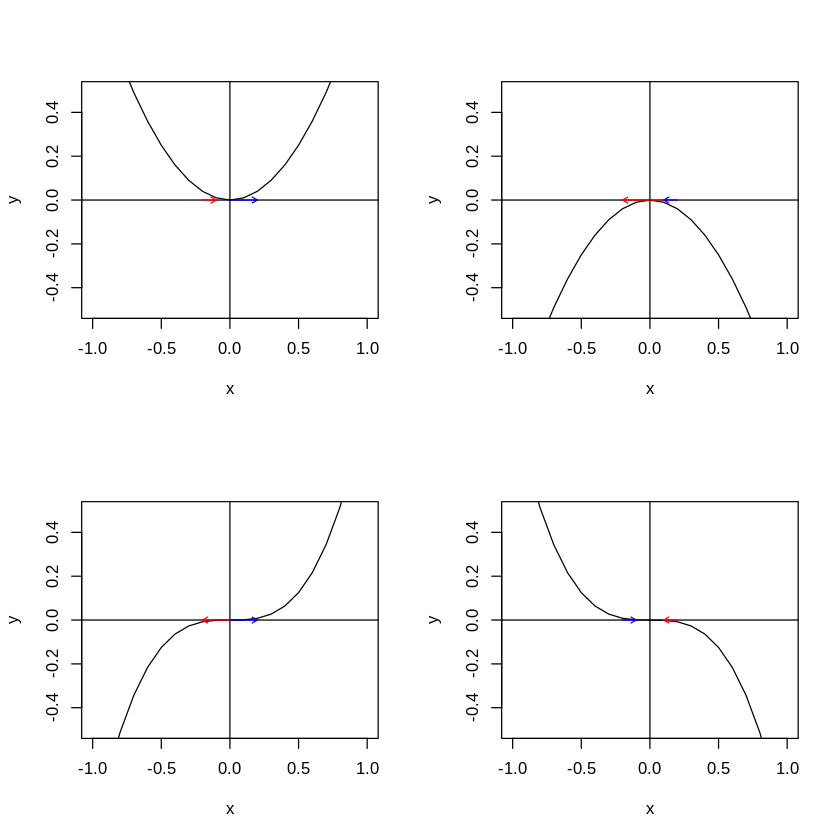

In [21]:
par(mfrow=c(2,2))
fun<-function(x) x^2
stabdiag(fun)
fun<-function(x) -x^2
stabdiag(fun)
fun<-function(x) x^3
stabdiag(fun)
fun<-function(x) -x^3
stabdiag(fun)


## Population growth under predation
Consider a group of herbivores maintained at a constant density H sustained by a biomass V. The vegetation growth can be used by the logistic (Verhulst) equation. In presence of consumption by herbivores we can combine the logistic vegetation growth with consumption by herbivores

\begin{align}
& C(V) = \frac{\beta H V^2}{V_0^2+V^2}\\
& G(V) = rV(1-\frac{V}{K})\\
& \frac{dV}{dt}=G(V)-C(V)
\label{eq:herbi2}
\end{align}

## Dimensionless form of the vegetation under herbivores
\small
Using the following substitutions:

\begin{align}
&\alpha =\frac{V_0}{K}\\
&X=\frac{V}{K}\\
&\tau=rt\\
&\gamma = \frac{\beta H}{rK}
\end{align}

we obtain,
\begin{equation}
\frac{dX}{dt}=X(1-X) - \frac{\gamma X^2}{\alpha^2+X^2}
\end{equation}


In [24]:
herbi<- function(alpha,gamma) {
X=seq(0,1,0.01)
n=length(X)
Y1<-X*(1-X)
Y2<-gamma* (X^2)/(alpha^2+X^2)
z<-cbind(X,Y1,Y2)
z<-matrix(z,ncol=3,nrow=n)
return(as.data.frame(z))
}




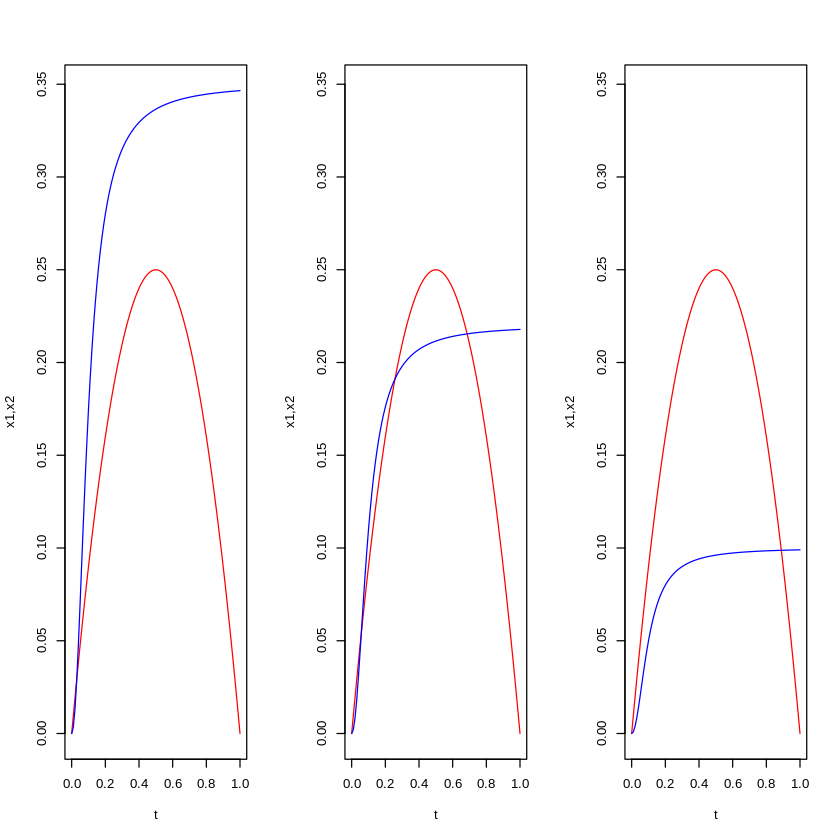

In [26]:
## Plotting the V  versus  G(V) and C(V)
gam<-c(0.35,0.22,0.1,0.05)
alph<-0.1
par(mfrow=c(1,3))
Z<-herbi(0.1,gam[1])
Zmx1<- max(Z[,2])
Zmx2<- max(Z[,3])
Zmx<-max(c(Zmx1,Zmx2))
plot(Z[,1],Z[,2],type='l',col='red',ylim=c(0,Zmx),xlab='t',ylab='x1,x2')
points(Z[,1],Z[,3],type='l',col='blue')
Z<-herbi(0.1,gam[2])
plot(Z[,1],Z[,2],type='l',col='red',ylim=c(0,Zmx),xlab='t',ylab='x1,x2')
points(Z[,1],Z[,3],type='l',col='blue')

Z<-herbi(0.1,gam[3])
plot(Z[,1],Z[,2],type='l',col='red',ylim=c(0,Zmx),xlab='t',ylab='x1,x2')
points(Z[,1],Z[,3],type='l',col='blue')

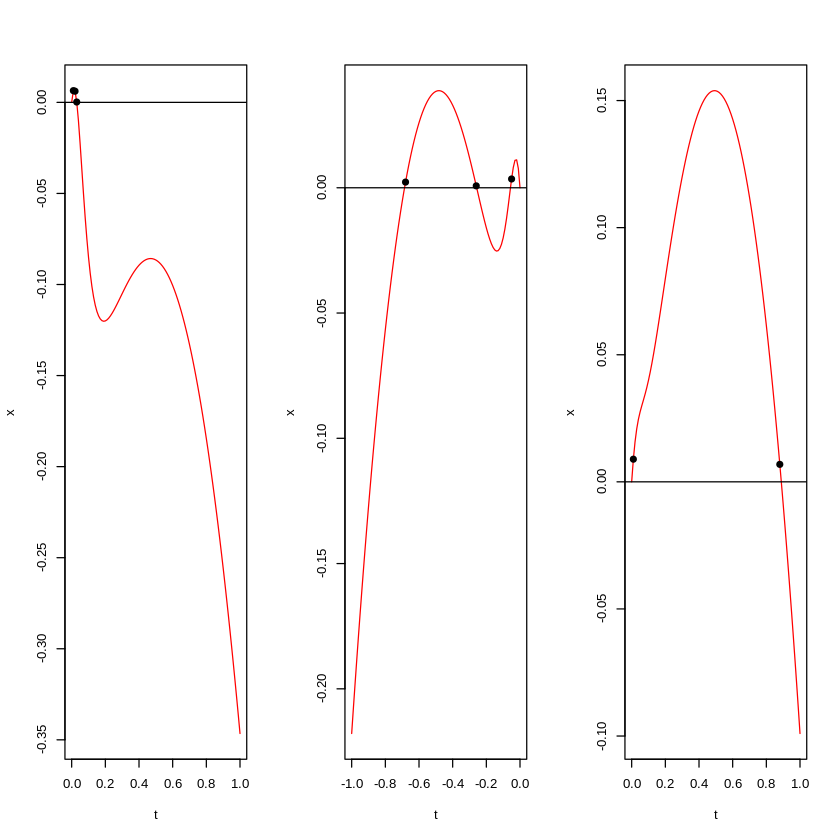

In [27]:
par(mfrow=c(1,3))
Z<-herbi(0.1,gam[1])
t<-Z[,1]
x=Z[,2]-Z[,3]
ik<-which(x>0 & abs(x)<0.01)
plot(t,x,type='l',col='red',xlab='t',ylab='x')
points(t[ik],x[ik],pch=19)
abline(h=0,col='black')

Z<-herbi(0.1,gam[2])
x=Z[,2]-Z[,3]
t=-Z[,1]
ik<-which(x>0 & abs(x)<0.0035)
plot(t,x,type='l',col='red',xlab='t',ylab='x')
points(t[ik],x[ik],pch=19)
abline(h=0,col='black')

Z<-herbi(0.1,gam[3])
t=Z[,1]
x=Z[,2]-Z[,3]
ik<-which(x>0 & abs(x)<0.01)
plot(Z[,1],x,type='l',col='red',xlab='t',ylab='x')
points(t[ik],x[ik],pch=19)
abline(h=0,col='black')


## Problem
Find out the stability behaviour of the critical points of the herbipvore-grass field interaction. The critical pints changes when gamma changes. Interpret the change ecologically.



## Model for insect outbreak - Ludwig budworm model

In the year 1978 , Ludwig proposed a budworm model. The model describes an interactions between budworms and forests.But worms have half lives of months whereas trees have life span of 7-10 years.The model is similar to the May model of herbivores.

Spruce budworms lives on leaves of trees and often destroys the whole trees. It happens periodically.

\begin{align}
&\frac{dN}{dt}=G(N) - p(N)\\
&\frac{dN}{dt}=RN\left( \ 1-\frac{N}{K} \right) - \frac{BN^2}{A^2+N^2}
\end{align}

In the above equation  the G(N) is the growth pattern of budworm and p(N) is the predation of budworms by birds.


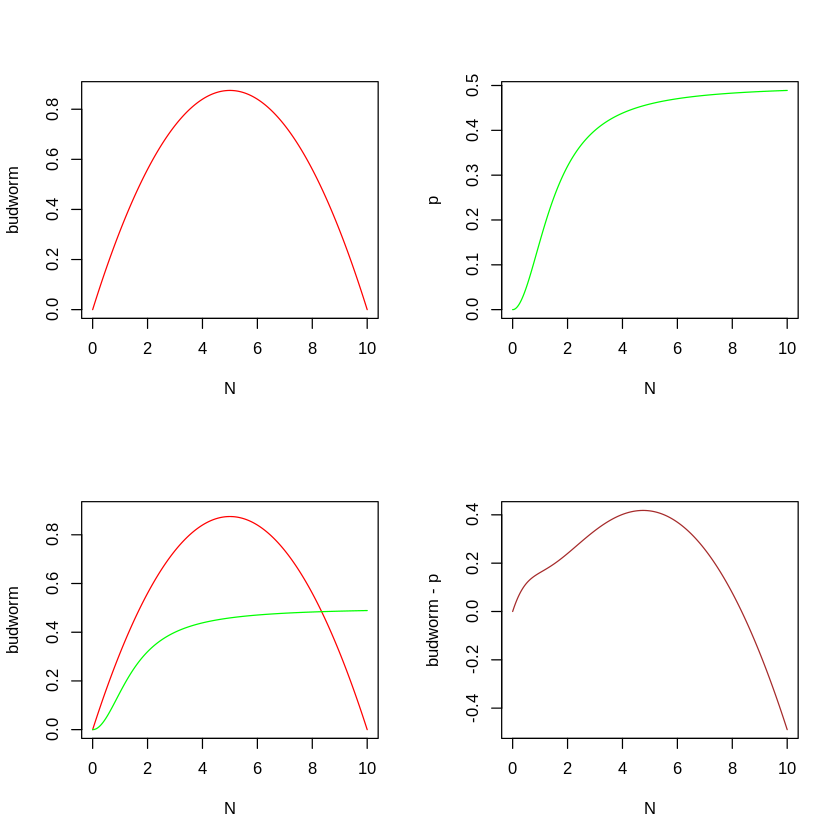

In [28]:
# plot of G(N)
R=0.35
K=10
# p(N),
A=1.5
B=.5
N=seq(0,10,0.01)
budworm=R*N*(1-N/K)
p=B*N*N/(A^2+N^2)
par(mfrow=c(2,2))
plot(N,budworm,col='red',type='l')
plot(N,p,col='green',type='l')
plot(N,budworm,col='red',type='l',ylim=c(0,0.9))
points(N,p,col='green',type='l')
plot(N,budworm-p,col='brown',type='l')

## Dimensionless  formulation of Ludwig model

The model expressed by equation  has 4 parameters (R,K,A & B). We can non-dimensioalize the system using the following substitution.

\begin{align}
&x=N/A\\
&\tau=Bt/A\\
&r=RA/B\\
&k=K/A\\
& \frac{dx}{d\tau}=rx\left( \ 1-\frac{x}{k} \right)-\frac{x^2}{1+x^2}
\end{align}

## Fixed points
Fixed point : x*=0  (No budworm)
The other fixed points are solution of the equation:
\begin{equation}
r(1-x/k)=\frac{x}{1+x^2}
\end{equation}


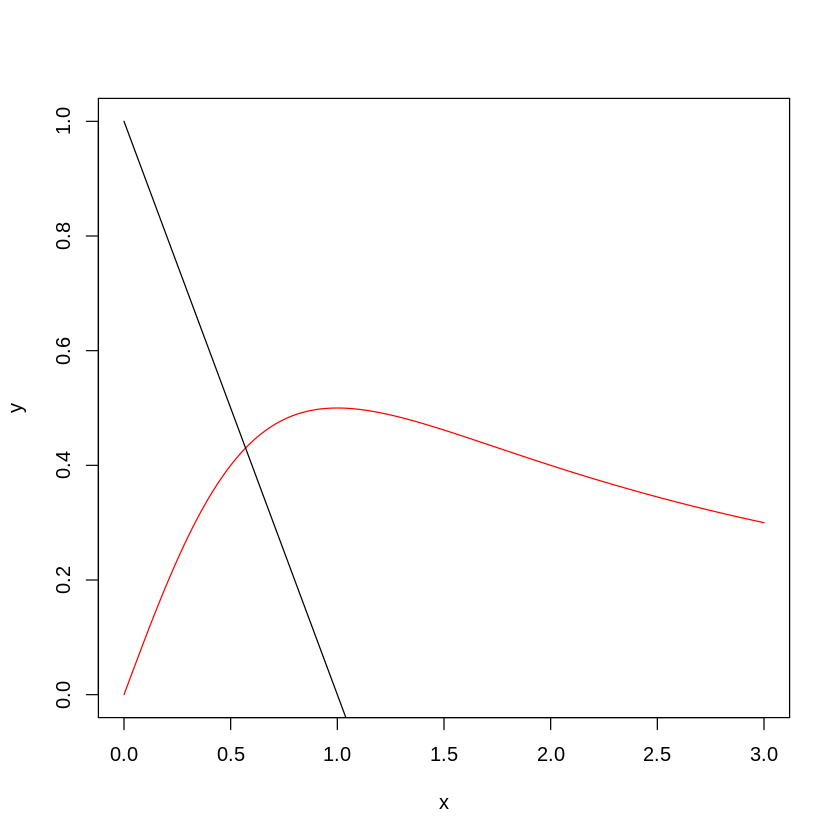

In [29]:
fun1=function(x) x/(1+x*x)
fun2=function(x,r,k) r*(1-x/k)
x=seq(0,3,0.01)


## Plots
plot(x,fun1(x),col='red',type='l',ylim=c(0,1),ylab='y')
points(x,fun2(x,1,1),'green',type='l')

# The intersection points may vary with parameters
# Rationalized the appearance of bistable behaviour